## Pickle file display

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from scipy import stats
from scipy import optimize
from scipy import integrate
from scipy import misc

from tqdm.notebook import tqdm
import timeit

In [2]:
n = 50
k_ = np.arange(1,n)
#k_ = np.array([1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,49])
#k_ = np.array([1,2,3,4,5,6,7,8,9,10,11,13,15,17,19])

In [4]:
file_ = pickle.load(open("scenarios_.pickle","rb")) #import

print("Coalition vs Individuals, n =", n)
for k in k_ :
    print("k {} | in {:.8f} | out {:.8f}".format(k,file_[n][k][3]['in'],file_[n][k][3]['out']))

Coalition vs Individuals, n = 50
k 1 | in 0.00039216 | out 0.00039120
k 2 | in 0.00039240 | out 0.00039169
k 3 | in 0.00039247 | out 0.00039214
k 4 | in 0.00039305 | out 0.00039335
k 5 | in 0.00039371 | out 0.00039478
k 6 | in 0.00039454 | out 0.00039653
k 7 | in 0.00039574 | out 0.00039889
k 8 | in 0.00039716 | out 0.00040166
k 9 | in 0.00039883 | out 0.00040491
k 10 | in 0.00040081 | out 0.00040874
k 11 | in 0.00040306 | out 0.00041299
k 12 | in 0.00040558 | out 0.00041791
k 13 | in 0.00041455 | out 0.00042967
k 14 | in 0.00041626 | out 0.00043451
k 15 | in 0.00041771 | out 0.00043914
k 16 | in 0.00041854 | out 0.00044314
k 17 | in 0.00042013 | out 0.00044718
k 18 | in 0.00043341 | out 0.00046778
k 19 | in 0.00044351 | out 0.00048400
k 20 | in 0.00044698 | out 0.00049303
k 21 | in 0.00045024 | out 0.00050217
k 22 | in 0.00045314 | out 0.00051022
k 23 | in 0.00046891 | out 0.00053752
k 24 | in 0.00047344 | out 0.00054996
k 25 | in 0.00048735 | out 0.00057617
k 26 | in 0.00049305 | out

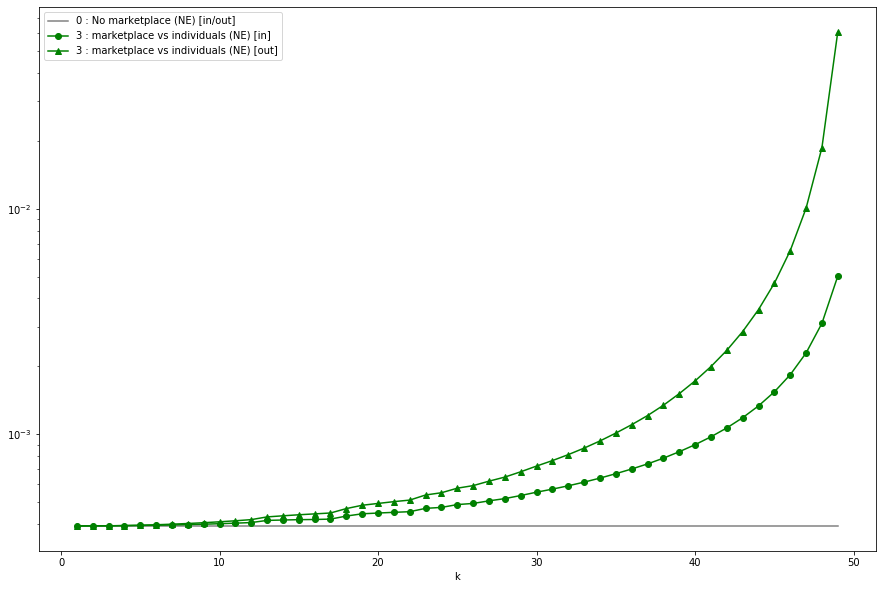

In [7]:
plt.figure(figsize=(15,10))
plt.xlabel("k")

plt.semilogy(k_,0*k_+1/(n*(n+1)),'-',color='gray',label="0 : No marketplace (NE) [in/out]")

#plt.semilogy(k_,[file_[n][k][1]['in'] for k in k_],'-o',color='red',label=r"1 : $r_{(2)}$ marketplace vs countercoallition [in]")
#plt.semilogy(k_,[file_[n][k][2]['in'] for k in k_],'-o',color='blue',label=r"2 : marketplace vs countercoallition (NE) [in]")
plt.semilogy(k_,[file_[n][k][3]['in'] for k in k_],'-o',color='green',label=r"3 : marketplace vs individuals (NE) [in]")

#plt.semilogy(k_,[file_[n][k][1]['out'] for k in k_],'-^',color='red',label=r"1 : $r_{(2)}$ marketplace vs countercoallition [out]")
#plt.semilogy(k_,[file_[n][k][2]['out'] for k in k_],'-^',color='blue',label=r"2 : marketplace vs countercoallition (NE) [out]")
plt.semilogy(k_,[file_[n][k][3]['out'] for k in k_],'-^',color='green',label=r"3 : marketplace vs individuals (NE) [out]")

#plt.semilogy(k_,0*k_+(n-1)/(n+1),'-',color='gray',label="0 : No marketplace (NE) [auct]")

#plt.semilogy(k_,[file_[n][k][1]['auct'] for k in k_],'-+',color='red',label=r"1 : $r_{(2)}$ marketplace vs countercoallition [auct]")
#plt.semilogy(k_,[file_[n][k][2]['auct'] for k in k_],'-+',color='blue',label=r"2 : marketplace vs countercoallition (NE) [auct]")
#plt.semilogy(k_,[file_[n][k][3]['auct'] for k in k_],'-+',color='green',label=r"3 : marketplace vs individuals (NE) [auct]")

plt.legend()
plt.show()

-----

In [2]:
def array_to_f(x,x_,y_) :
    return y_[min(np.searchsorted(x_,x),len(x_)-1)]

def array_to_inverse_f(y,x_,y_) :
    return x_[min(np.searchsorted(y_,y),len(y_)-1)]

def f_to_array(f,x_,) :
    return np.array([f(x) for x in x_])

In [3]:
def scenario1_iterate_CUSTOM(k1,k2,RV_1,RV_2,eps=10**-5,nb_eval_max=500,N=10_000,show_msg=False) :
    l1 = RV_1.pdf(0)*(1+1/k2)
    l2 = RV_2.pdf(0)*(1+1/(k1+k2-1))
    
    a = max(min(1/l1,1),0)  #warning if the support is changed
    b = max(min(1/l2,1),0)
    
    tau = (np.sqrt(5)-1)/2
    
    x_1 = a + (1-tau)*(b-a)
    f_1 = scenario1_shoot(x_1,k1,k2,RV_1,RV_2,N,correct=True)
    
    x_2 = a + tau*(b-a)
    f_2 = scenario1_shoot(x_2,k1,k2,RV_1,RV_2,N,correct=True)
    
    i=2
    while(f_1['eps_star']>eps and f_2['eps_star']>eps and i < nb_eval_max) :
        if(f_1['eps_star'] > f_2['eps_star']) :
            a = x_1
            x_1 = x_2
            f_1 = f_2
            x_2 = a + tau*(b-a)
            f_2 = scenario1_shoot(x_2,k1,k2,RV_1,RV_2,N,correct=True)
        else :
            b = x_2
            x_2 = x_1
            f_2 = f_1
            x_1 = a + (1-tau)*(b-a)
            f_1 = scenario1_shoot(x_1,k1,k2,RV_1,RV_2,N,correct=True)
        i+=1
    
    if(show_msg) :
        print("Nb of eval :",i)
        print("eps_star :",min(f_1['eps_star'],f_2['eps_star']))
        if(i==nb_eval_max) :
            print("Maximum number of evaluations reached")
            
    if(f_1['eps_star']<f_2['eps_star']) :
        return f_1
    else :
        return f_2

In [4]:
def scenario1_shoot(tstar,k1,k2,RV_1,RV_2,N=10_000,correct=True) :
    delta1_star_ = np.zeros(N+2)
    delta2_star_ = np.zeros(N+2)
    
    l1 = RV_1.pdf(0)*(1+1/k2)
    l2 = RV_2.pdf(0)*(1+1/(k1+k2-1))
    
    output = {}
    output['tstar'] = tstar
    output['N']=N
    output['breakpoint'] = 0
    output['l1'] = l1
    output['l2'] = l2
    output['k1'] = k1
    output['k2'] = k2
    
    delta1_star_[N+1] = 1/tstar #warning: if the rvs are not support by [0,1]
    delta2_star_[N+1] = 1/tstar 
    
    a0 = 0; a1 = 0; b0 = 0; b1 = 0
    
    for j in np.arange(N+1,0,-1) : #j=N+1,...,1
        tj = tstar*j/(N+1)

        a0 = delta1_star_[j]
        b0 = delta2_star_[j]
        
        b1 = b0*(1/(k2*(RV_1.ppf(max(min(a0*tj,1),0))-tj))-1/tj)
        a1 = a0/tj * ( -1+ (1/(k1*b0))*( (tj*b0)/(RV_2.ppf(max(min(b0*tj,1),0))-tj)-(k2-1)*(b1*tj+b0) ) )
        
        tjm1 = tstar*(j-1)/(N+1)
        
        delta1_star_[j-1] = a0+(tjm1-tj)*a1 #we guarantee that the next step is within the support
        delta2_star_[j-1] = b0+(tjm1-tj)*b1
        
#        if(delta1_star_[j-1] < 0 or delta1_star_[j-1]>1/tjm1 or delta2_star_[j-1] < 0 or delta2_star_[j-1]>1/tjm1) :
#            print("delta1_star or delta2_star is out of range for j=",j-1)
        
        if(output['breakpoint'] == 0 and ((delta1_star_[j-1]-l1)**2+(delta2_star_[j-1]-l2)**2 > ((delta1_star_[j]-l1)**2+(delta2_star_[j]-l2)**2))) :
            output['breakpoint'] = j
            if(correct) :
                break
                
    output['eps_star'] = np.sqrt(((delta1_star_[output['breakpoint']]-l1)**2+(delta2_star_[output['breakpoint']]-l2)**2))
    #output['precision'] = np.min(((delta1_-l1)**2+(delta2_-l2)**2))
    if(correct) :
        ind = output['breakpoint']
        delta1_star_[:ind+1] = np.linspace(l1,delta1_star_[ind],ind+1)
        delta2_star_[:ind+1] = np.linspace(l2,delta2_star_[ind],ind+1)
        
    output['delta1_star_']=delta1_star_
    output['delta2_star_']=delta2_star_
    output['values1_']=RV_1.ppf(np.linspace(0,tstar,N+2)*delta1_star_)
    output['values2_']=RV_2.ppf(np.linspace(0,tstar,N+2)*delta2_star_)
    return output

In [5]:
def scenario3(k,n,N=10_000,eps=10**-3) :
    """
    The marketplace is playing against individuals, each player is strategic and plays NE
    """
    RV_1 = stats.uniform()
    RV_2 = stats.uniform()

    out = scenario1_iterate_CUSTOM(k,n-k,RV_1,RV_2,N=N,eps=eps)
    b_ = np.linspace(0,out['tstar'],N+2)
    
    
    v_in_f = lambda b:array_to_f(b,b_,out['values1_'])
    v_out_f = lambda b:array_to_f(b,b_,out['values2_'])
    b_in_f = lambda v:array_to_inverse_f(v,b_,out['values1_'])
    b_out_f = lambda v:array_to_inverse_f(v,b_,out['values2_'])
    
    
    integrand_in = lambda v : (v-b_in_f(v))*(v_out_f(b_in_f(v))**(n-k)) * k*v**(k-1)
    integrand_out = lambda v : (v-b_out_f(v))*(v_in_f(b_out_f(v))**k) * ((n-k)*v**(n-k-1))
    integrand_auct = lambda v : b_in_f(v)*((v_out_f(b_in_f(v)))**(n-k))*k*v**(k-1) + b_out_f(v)*((v_in_f(b_out_f(v)))**k)*(n-k)*v**(n-k-1)
    
    output = {}
    
    output['in'] = integrate.quad(integrand_in, 0, 1, limit=1000, epsabs=10**-10,epsrel=10**-10)[0]/k
    output['out'] = integrate.quad(integrand_out,0,1, limit=1000, epsabs=10**-10,epsrel=10**-10)[0]/(n-k)
    output['auct'] = integrate.quad(integrand_auct,0,1, limit=1000, epsabs=10**-10,epsrel=10**-10)[0]
    
    return output

### Test

In [6]:
scenarios_ = {}

In [17]:
n = 50
k_ = np.array([1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,49])

scenarios_[n] = {}

for k in tqdm(k_) :
    scenarios_[n][k] = {3:{}}
    
    if(k <= 10) :
        output = scenario3(k,n,eps=10**-8)
    else : 
        output = scenario3(k,n,eps=10**-6)
            
    scenarios_[n][k][3]['auct'] = output['auct']
    scenarios_[n][k][3]['in'] = output['in']
    scenarios_[n][k][3]['out'] = output['out']

/Users/m.hihat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
/Users/m.hihat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/Users/m.hihat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieve

In [18]:
print("Coalition vs Individuals, n =", n)
for k in k_ :
    print("k {} | in {:.8f} | out {:.8f}".format(k,scenarios_[n][k][3]['in'],scenarios_[n][k][3]['out']))

Coalition vs Individuals, n = 50
k 1 | in 0.00039216 | out 0.00039120
k 2 | in 0.00039224 | out 0.00039154
k 3 | in 0.00039252 | out 0.00039218
k 4 | in 0.00039298 | out 0.00039328
k 5 | in 0.00039366 | out 0.00039473
k 6 | in 0.00039456 | out 0.00039653
k 7 | in 0.00039570 | out 0.00039886
k 8 | in 0.00039710 | out 0.00040161
k 9 | in 0.00039877 | out 0.00040485
k 10 | in 0.00040072 | out 0.00040869
k 15 | in 0.00041553 | out 0.00043677
k 20 | in 0.00044110 | out 0.00048578
k 25 | in 0.00048260 | out 0.00056954
k 30 | in 0.00055022 | out 0.00071750
k 35 | in 0.00066717 | out 0.00100877
k 40 | in 0.00090038 | out 0.00172398
k 45 | in 0.00155554 | out 0.00466625
k 49 | in 0.00519071 | out 0.04394895


File writing

In [20]:
for k in k_ :
    file_[n][k][3] = scenarios_[n][k][3]
    
pickle.dump(file_,open("scenarios_.pckle","wb"))

LaTeX formatting

In [40]:
n = 5
k_ = np.arange(1,n)

print("Coalition vs Individuals, n =", n)
for k in k_ :
    print(" & {} & {:.4f} & {:.5f} & {:.5f} \\\\".format(k,file_[n][k][3]['auct'],file_[n][k][3]['in'],file_[n][k][3]['out']))

Coalition vs Individuals, n = 5
 & 1 & 0.6668 & 0.03333 & 0.03333 \\
 & 2 & 0.6511 & 0.03498 & 0.03715 \\
 & 3 & 0.6089 & 0.04068 & 0.04865 \\
 & 4 & 0.5055 & 0.05682 & 0.08565 \\


In [38]:
1/(5*6)

0.03333333333333333